<a href="https://colab.research.google.com/github/amitmee/amitmee.github.io/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import math
import pandas_datareader as web
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [24]:
df = web.DataReader('AL',data_source = 'yahoo',start = '2012-01-01',end = '2019-06-30')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,24.000000,23.320000,23.920000,23.520000,263500.0,21.945379
2012-01-04,23.950001,23.389999,23.389999,23.600000,181300.0,22.020025
2012-01-05,23.750000,23.100000,23.469999,23.420000,175600.0,21.852070
2012-01-06,23.750000,23.180000,23.750000,23.280001,219300.0,21.721447
2012-01-09,23.750000,23.320000,23.389999,23.740000,121800.0,22.150656
...,...,...,...,...,...,...
2019-06-24,40.490002,39.619999,40.330002,39.700001,840000.0,38.743797
2019-06-25,39.830002,39.410000,39.730000,39.509998,406900.0,38.558369
2019-06-26,40.480000,39.639999,39.759998,40.290001,474100.0,39.319588


In [25]:
df.shape

(1884, 6)

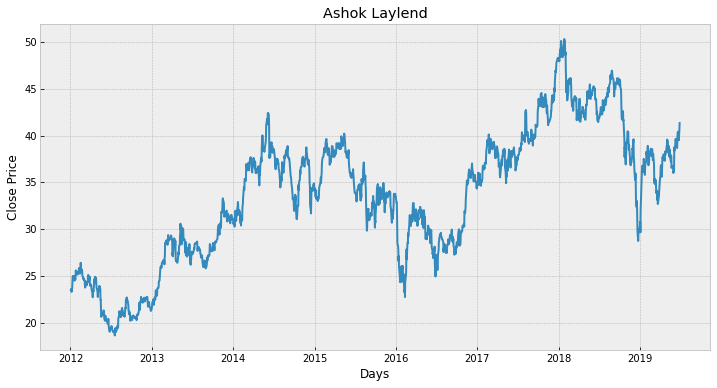

In [26]:
plt.figure(figsize=(12,6))
plt.title('Ashok Laylend')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

In [27]:
df=df.filter(['Close'])
df.head(6)

,Close
Date,
2012-01-03,23.520000
2012-01-04,23.600000
2012-01-05,23.420000
2012-01-06,23.280001
2012-01-09,23.740000
2012-01-10,24.480000


In [29]:
future_days = 25
df['Prediction']=df['Close'].shift(-future_days)
df.tail(6)

,Close,Prediction
Date,,
2019-06-21,40.270000,NaN
2019-06-24,39.700001,NaN
2019-06-25,39.509998,NaN
2019-06-26,40.290001,NaN
2019-06-27,40.630001,NaN
2019-06-28,41.340000,NaN


In [30]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[23.52000046]
 [23.60000038]
 [23.42000008]
 ...
 [37.86999893]
 [37.41999817]
 [36.54999924]]


In [33]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[25.81999969 25.37999916 25.27000046 ... 40.29000092 40.63000107
 41.34000015]


In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [35]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr= LinearRegression().fit(x_train,y_train)

In [37]:
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[37.79999924],
       [37.31000137],
       [38.        ],
       [38.29000092],
       [37.93999863],
       [38.22999954],
       [38.41999817],
       [38.56000137],
       [38.90000153],
       [38.86000061],
       [39.58000183],
       [39.38000107],
       [38.43999863],
       [38.34000015],
       [38.13999939],
       [38.90000153],
       [37.75999832],
       [38.52999878],
       [38.36000061],
       [38.15999985],
       [37.61999893],
       [37.22000122],
       [37.86999893],
       [37.41999817],
       [36.54999924]])

In [38]:
tree_p =tree.predict(x_future)
print(tree_p)
print()
lr_p=lr.predict(x_future)
print(lr_p)

[38.67000008 36.72999954 39.02999878 35.95000076 36.91250038 36.40999985
 39.61499977 38.28499985 38.32333247 37.36333338 39.52999878 39.58000183
 39.18333308 38.81000137 37.36000061 38.32333247 38.25333277 40.11999893
 39.27000046 40.27000046 39.70000076 36.59999847 38.03499985 36.27000046
 41.34000015]

[37.50613387 37.06858972 37.68472477 37.94368142 37.63114648 37.89010312
 38.05976261 38.18477863 38.48838215 38.45266328 39.09558918 38.91699828
 38.07762204 37.98832829 37.80973738 38.48838215 37.470415   38.15798778
 38.00618772 37.82759682 37.34540239 36.98822398 37.56864017 37.16681148
 36.38994496]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


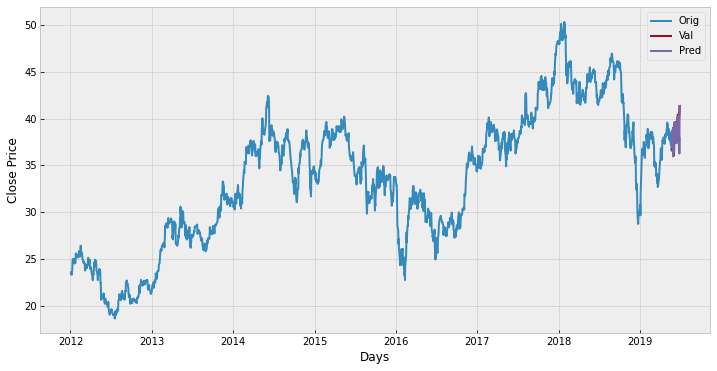

In [39]:
pr =tree_p
valid = df[X.shape[0]:]
valid['Predictions']=pr
plt.figure(figsize=(12,6))
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


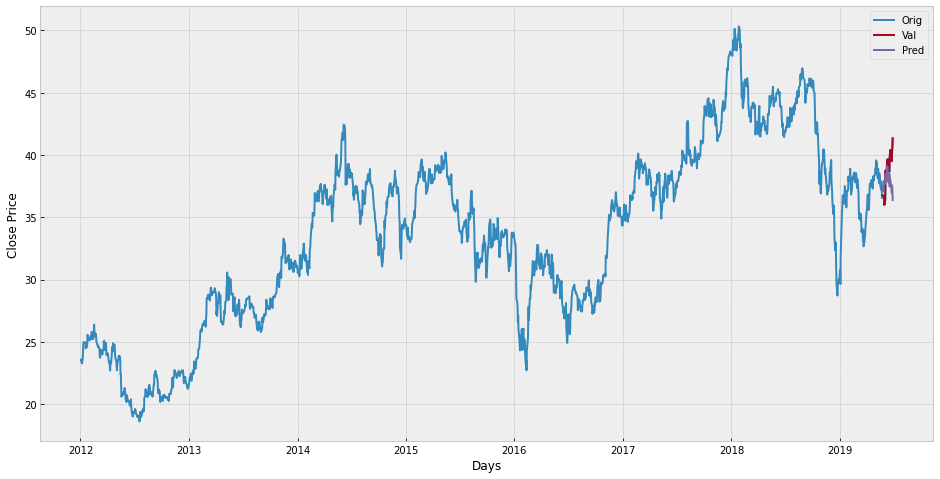

In [40]:
pr =lr_p
valid = df[X.shape[0]:]
valid['Predictions']=pr
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()